## Testing 2D Propagation

In [1]:
import sys
import os

# Get absolute path to the real src folder (repo root + src)
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, os.path.join(repo_root, "src"))

import fourieroptics as fo


## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import fourieroptics as fo

# -------------------------
# Parameters
# -------------------------
N = int(1e5)            # grid points
dx = 1e-8               # grid spacing (10 nm here, careful: comment said 10 µm!)
wavelength = 633e-9     # 633 nm
z_max = 0.2             # 20 cm propagation
pinhole_width = 200e-6  # 200 µm pinhole

# -------------------------
# 1D coordinate grid and pinhole
# -------------------------
x = fo.coords_1D(N, dx)
E0 = fo.pinhole_1D(x, pinhole_width)

## Testing Thin Lens

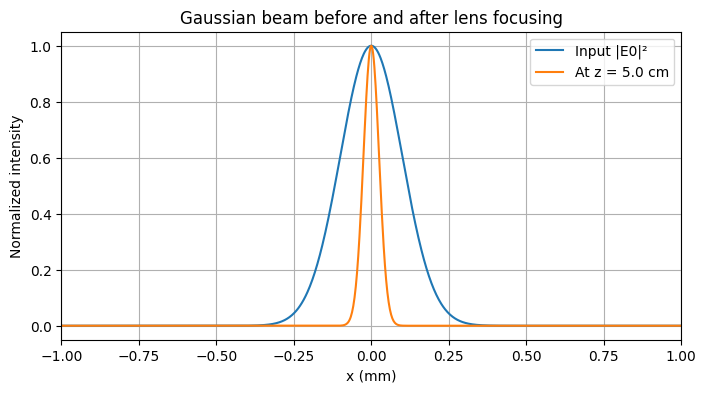

In [3]:
# Parameters
N = 2**14                 # grid points (power of 2 recommended)
dx = 2e-6                 # sampling pitch (2 µm)
wavelength = 633e-9       # 633 nm
w0 = 200e-6               # input Gaussian waist (200 µm)
f = 0.05                  # lens focal length = 5 cm

# Build grid and source
x = fo.coords_1D(N, dx)
E0 = fo.gaussian_beam_1D(x, w0)

# Create thin-lens phase mask and apply it
L = fo.thin_lens_1D(x, focal_length=f, wavelength=wavelength)
E_after_lens = E0 * L

# Option A: Propagate directly to z = f with angular spectrum (accurate)
E_at_f = fo.angular_spectrum_1D(E_after_lens, dx, wavelength, f)

# Compare input and focused intensity profiles
plt.figure(figsize=(8,4))
plt.plot(x*1e3, np.abs(E0)**2 / np.max(np.abs(E0)**2), label="Input |E0|²")
plt.plot(x*1e3, np.abs(E_at_f)**2 / np.max(np.abs(E_at_f)**2), label=f"At z = {f*100:.1f} cm")
plt.xlim(-1, 1)
plt.xlabel("x (mm)")
plt.ylabel("Normalized intensity")
plt.title("Gaussian beam before and after lens focusing")
plt.legend()
plt.grid(True)
plt.show()